In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
from sklearn.datasets.samples_generator import make_regression
X, y = make_regression(n_samples = 1000, 
                       n_features=1, 
                       n_informative=1, 
                       noise=20,
                       random_state=42)

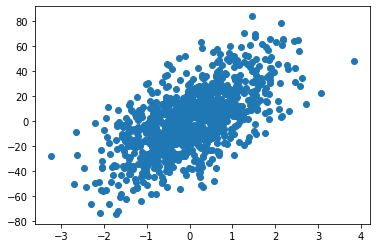

In [7]:
plt.scatter(X, y)

In [9]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
print("theta0: {} theta1: {}".format(lin_reg.intercept_, lin_reg.coef_[0]))

theta0: 0.09052411811641858 theta1: 16.518833878084024


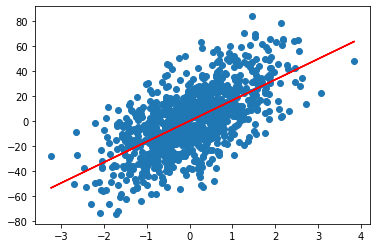

In [10]:
plt.scatter(X, y)
plt.plot(X, lin_reg.coef_[0]*X + lin_reg.intercept_, 'r')

In [11]:
y = y.reshape(-1,1)

In [12]:
def cal_cost(theta,X,y):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1/2*m) * np.sum(np.square(predictions-y))
    return cost

In [13]:
def gradient_descent(X, y, theta, learning_rate=0.01, iterations=100):
    m = len(y)
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations, 2))
    for it in range(iterations):
        prediction = np.dot(X, theta)
        theta = theta - (1 / m) * learning_rate * (X.T.dot((prediction - y)))
        theta_history[it, :] = theta.T
        cost_history[it] = cal_cost(theta, X, y)
    return theta, cost_history, theta_history

In [14]:
lr = 0.05
n_iter = 1000
theta = np.random.randn(2, 1)
X_b = np.c_[np.ones((len(X), 1)), X]
theta, cost_history, theta_history = gradient_descent(X_b, y, theta, lr, n_iter)
print("Theta0: {:0.3f},\nTheta1:{:0.3f}".format(theta[0][0], theta[1][0]))
print("Final cost/MSE:  {:0.3f}".format(cost_history[-1]))

Theta0: 0.091,
Theta1:16.519
Final cost/MSE:  196036150.503


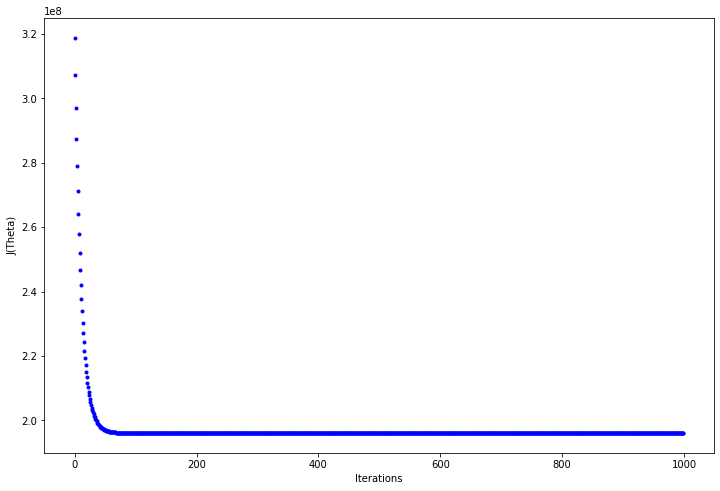

In [15]:
fig,ax = plt.subplots(figsize=(12,8))
ax.set_ylabel('J(Theta)')
ax.set_xlabel('Iterations')
_=ax.plot(range(n_iter),cost_history,'b.')

In [16]:
def stocashtic_gradient_descent(X, y, theta, learning_rate=0.01, iterations=10):
    m = len(y)
    cost_history = np.zeros(iterations)
    for it in range(iterations):
        cost = 0.0
        for i in range(m):
            rand_ind = np.random.randint(0, m)
            X_i = X[rand_ind, :].reshape(1, X.shape[1])
            y_i = y[rand_ind].reshape(1, 1)
            prediction = np.dot(X_i, theta)
            theta = theta - (1 / m) * learning_rate * (X_i.T.dot((prediction - y_i)))
            cost += cal_cost(theta, X_i, y_i)
        cost_history[it] = cost
    return theta, cost_history

In [17]:
lr = 0.05
n_iter = 1000
theta = np.random.randn(2, 1)
X_b = np.c_[np.ones((len(X),1)),X]
theta,cost_history = stocashtic_gradient_descent(X_b,y,theta,lr,n_iter)
print("Theta0: {:0.3f},\nTheta1:{:0.3f}".format(theta[0][0], theta[1][0]))
print("Final cost/MSE:  {:0.3f}".format(cost_history[-1]))

Theta0: 0.078,
Theta1:16.540
Final cost/MSE:  194771.762


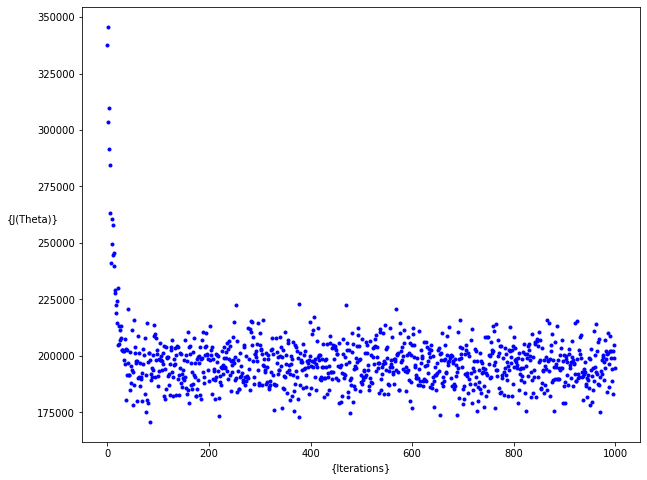

In [18]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.set_ylabel("{J(Theta)}", rotation=0)
ax.set_xlabel("{Iterations}")
theta = np.random.randn(2, 1)
_ = ax.plot(range(n_iter), cost_history, "b.")

In [19]:
def minibatch_gradient_descent(X,y,theta,learning_rate=0.01, iterations=10, batch_size =20):
    m = len(y)
    cost_history = np.zeros(iterations)
    n_batches = int(m/batch_size)
    for it in range(iterations):
        cost =0.0
        indices = np.random.permutation(m)
        X = X[indices]
        y = y[indices]
        for i in range(0,m,batch_size):
            X_i = X[i:i+batch_size]
            y_i = y[i:i+batch_size]
            X_i = np.c_[np.ones(len(X_i)),X_i]
            prediction = np.dot(X_i,theta)
            theta = theta -(1/m)*learning_rate*( X_i.T.dot((prediction - y_i)))
            cost += cal_cost(theta,X_i,y_i)
        cost_history[it]  = cost
    return theta, cost_history

In [20]:
lr = 0.05
n_iter = 1000
theta = np.random.randn(2, 1)
theta,cost_history = minibatch_gradient_descent(X,y,theta,lr,n_iter)
print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))

Theta0:          0.089,
Theta1:          16.519
Final cost/MSE:  3920284.692


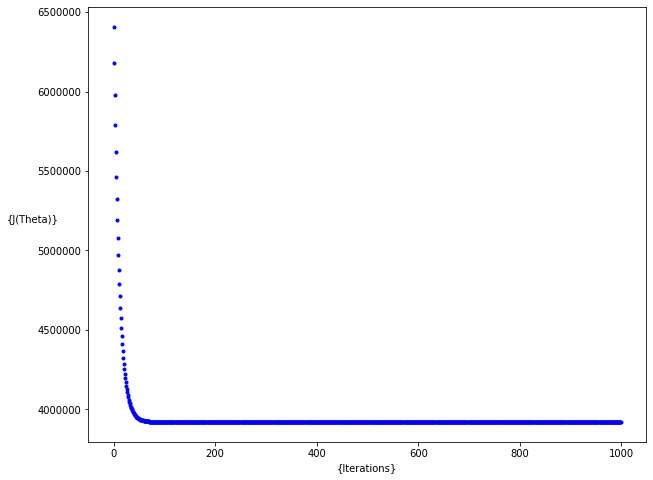

In [21]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.set_ylabel("{J(Theta)}", rotation=0)
ax.set_xlabel("{Iterations}")
theta = np.random.randn(2, 1)
_ = ax.plot(range(n_iter), cost_history, "b.")